# Placement Assignment

## PYTHON

### Q1.Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.  
#### Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [12]:
#Ans1. Here's a Python program that counts the frequency of each word in a string and returns the length of the highest-frequency word:

def highest_frequency_word_length(s: str) -> int:
    
# Split the string into words
    words = s.split()

# Count the frequency of each word
    word_freq = {}
    for word in words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# Find the highest frequency
    max_freq = max(word_freq.values())

# Find the length of the highest-frequency word
    highest_freq_word_length = max(len(word) for word in word_freq if word_freq[word] == max_freq)

    return highest_freq_word_length

In [16]:
# Example
s = "write write write all the number from from from 1 to 100"
print(highest_frequency_word_length(s))

#Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5

5


In [27]:
#additional test cases:

s= "apple apple apple banana banana orange orange orange"
    
print(highest_frequency_word_length(s))

#Explanation: The word "banana" appears 2 times ,"orange" appears 3 times and apple also appears 3 times. The highest frequency is 3, and the highest-frequency word "orange" has a length of 6.



6


In [25]:
s= "A A A A C A B B C"
    
print(highest_frequency_word_length(s))

#Explanation: The word "A" appears 5 times, the word "B" appears 2 times, and the word "C" appears 1 time. The highest frequency is 5, and the highest-frequency word "A" has a length of 1.

5


### Q2.Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO. Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [28]:
def is_valid_string(string):
    char_freq = {}
    for char in string:
        if char in char_freq:
            char_freq[char] += 1
        else:
            char_freq[char] = 1

    freq_values = set(char_freq.values())

    # If all characters have the same frequency, the string is already valid
    if len(freq_values) == 1:
        return "YES"

    # If more than two different frequencies, it's not possible to make the string valid
    if len(freq_values) > 2:
        return "NO"

    # If exactly two different frequencies, check if removing one character makes the string valid
    freq_counts = list(char_freq.values())
    freq_counts.sort()

    if freq_counts[0] == 1 and freq_counts.count(freq_counts[0]) == 1:
        return "YES"  # Removing the character with frequency 1 makes the string valid

    if freq_counts[-1] - freq_counts[-2] == 1 and freq_counts.count(freq_counts[-1]) == 1:
        return "YES"  # Removing the character with the highest frequency makes the string valid

    return "NO"  # Removing one character does not make the string valid

In [29]:
# Testing the function with examples
string1 = "abcde"
print(is_valid_string(string1)) # Output: YES 
# Explanation: All characters appear once, so the string is already valid.

string2 = "aabbc"
print(is_valid_string(string2)) # Output: YES
# Explanation: the characters in the string do not appear the same number of times but if we remove one character 'c' at index 4 in the string, the remaining characters will occur the same number of times.

string3 = "aabbcd"
print(is_valid_string(string3))  # Output: NO
# Explanation: Removing any character will result in different frequencies for the remaining characters.

string4 = "aabbccc"
print(is_valid_string(string4))  # Output: YES
# Explanation: Removing one 'c' will result in all characters having the same frequency (2).

YES
YES
NO
YES


### Q3. Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. Note - Write comments wherever necessary explaining the code written.

#### Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Data Attributes - id: Identification Number - int num: Number of the
 1. Pokémon in the official Pokédex - int name: Pokémon name -
 2. string img: URL to an image of this Pokémon - string type:
 3.  Pokémon type -string height: Pokémon height - float
 4.  weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given
 5. when transferred - string candy_count: the amount of candies required to evolve- int
 6. egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
 7. Percentage of spawn chance (NEW) - float avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
 8. spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers:
     Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of
 9. Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name ofsuccessive evolutions of Pokémon - list   of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict

In [33]:
#Ans3.To download the data from the provided link, read and convert it into properly structured data,and return it in Excel format, we can use the following Python program:

import requests
import json
import pandas as pd


def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")


def convert_to_dataframe(data):
    json_data = json.loads(data)
    pokemon_list = json_data["pokemon"]

    # Extract relevant attributes from each Pokémon
    pokemon_data = []
    for pokemon in pokemon_list:
        pokemon_info = {
            "id": pokemon["id"],
            "num": pokemon["num"],
            "name": pokemon["name"],
            "img": pokemon["img"],
            "type": ", ".join(pokemon["type"]),
            "height": pokemon["height"],
            "weight": pokemon["weight"],
            "candy": pokemon.get("candy", ""),
            "candy_count": pokemon.get("candy_count", 0),
            "egg": pokemon.get("egg", ""),
            "spawn_chance": pokemon.get("spawn_chance", 0.0),
            "avg_spawns": pokemon.get("avg_spawns", 0),
            "spawn_time": pokemon.get("spawn_time", ""),
            "multipliers": ", ".join(str(multiplier) for multiplier in pokemon.get("multipliers") or []),
            "weakness": ", ".join(pokemon.get("weaknesses", [])),
            "next_evolution": ", ".join(evolution["name"] for evolution in pokemon.get("next_evolution", [])),
            "prev_evolution": ", ".join(evolution["name"] for evolution in pokemon.get("prev_evolution", []))
        }
        pokemon_data.append(pokemon_info)

    # Create a DataFrame from the extracted Pokémon data
    df = pd.DataFrame(pokemon_data)

    return df


def save_to_excel(dataframe, output_file):
    dataframe.to_excel(output_file, index=False)


# Download the data from the provided link
data_url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

downloaded_data = download_data(data_url)

# Convert the downloaded data to a DataFrame
pokemon_df = convert_to_dataframe(downloaded_data)

# Save the DataFrame to an Excel file
output_excel_file = "pokemon_data.xlsx"
save_to_excel(pokemon_df, output_excel_file)

print(f"Data successfully converted and saved to {output_excel_file}.")


Data successfully converted and saved to pokemon_data.xlsx.


### Q4. Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.

Link - https://data.nasa.gov/resource/y77d-th95.json

Note - Write code comments wherever needed for code understanding.

Excepted Output Data Attributes
1. Name of Earth Meteorite - string id - ID of Earth
2. Meteorite - int nametype - string recclass - string
3. mass - Mass of Earth Meteorite - float year - Year at which Earth
4. Meteorite was hit - datetime format reclat - float recclong - float
5. point coordinates - list of int

In [36]:
#Ans4.Here's a program that downloads data from the provided link, converts it into a structured format, and saves it as a CSV file. The code includes comments to explain each step:

import requests
import pandas as pd

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to download data. Status code: {response.status_code}")

def convert_to_dataframe(data):
    # Extract relevant attributes from each meteorite
    meteorite_data = []
    for meteorite in data:
        meteorite_info = {
            "name": meteorite.get("name", ""),
            "id": meteorite.get("id", ""),
            "nametype": meteorite.get("nametype", ""),
            "recclass": meteorite.get("recclass", ""),
            "mass": meteorite.get("mass (g)", 0.0),
            "year": meteorite.get("year", ""),
            "reclat": meteorite.get("reclat", 0.0),
            "reclong": meteorite.get("reclong", 0.0),
            "coordinates": [meteorite.get("reclat", 0.0), meteorite.get("reclong", 0.0)]
        }
        meteorite_data.append(meteorite_info)


    # Create a DataFrame from the extracted meteorite data
    df = pd.DataFrame(meteorite_data)

    return df

def save_to_csv(dataframe, output_file):
    dataframe.to_csv(output_file, index=False)

# Download the data from the provided link
data_url = "https://data.nasa.gov/resource/y77d-th95.json"
downloaded_data = download_data(data_url)

# Convert the downloaded data to a DataFrame
meteorite_df = convert_to_dataframe(downloaded_data)

# Save the DataFrame to a CSV file
output_csv_file = "meteorite_data.csv"
save_to_csv(meteorite_df, output_csv_file)

print(f"Data successfully converted and saved to {output_csv_file}.")


Data successfully converted and saved to meteorite_data.csv.


### Q5.Write a program to download the data from the given API link and then extract the following data with proper formatting.

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note - Write proper code comments wherever needed for the code understanding

Sample Data -

Excepted Output Data Attributes -
1. id - int url - string
2. name - string season
3. int number - int
4. type - string airdate -
5. date format airtime -
6. 12-hour time format
7. runtime - float
8. average rating - float
9. summary - string
10. without html tags
11. medium image link - string
12. Original image link - string

In [2]:
#Ans5. To download data from the given API link and extract the required data attributes, we can use the following Python code:
import requests
import json
from bs4 import BeautifulSoup

# API endpoint URL
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send GET request to the API endpoint
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    data = response.json()
    
    # Extract episode details
    episodes = data["_embedded"]["episodes"]
    
    # Iterate over each episode and extract the required attributes
    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_name = episode["name"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        if "average" in episode["rating"]:
            episode_rating = episode["rating"]["average"]
        else:
            episode_rating = None
        if "summary" in episode:
            soup = BeautifulSoup(episode["summary"], 'html.parser')
            summary_text = soup.get_text()
            summary_text = summary_text.replace('\n', ' ')
            summary_text = ' '.join(summary_text.split())
            episode_summary = summary_text
        else:
            episode_summary = None
        if "image" in episode:
            if "medium" in episode["image"]:
                episode_image_medium = episode["image"]["medium"]
            else:
                episode_image_medium = None
            if "original" in episode["image"]:
                episode_image_original = episode["image"]["original"]
            else:
                episode_image_original = None
        else:
            episode_image_medium = None
            episode_image_original = None
        
        # Formatting the extracted data
        formatted_data = f"""
Episode ID: {episode_id}
Episode URL: {episode_url}
Episode Name: {episode_name}
Season: {episode_season}
Number: {episode_number}
Type: {episode_type}
Airdate: {episode_airdate}
Airtime: {episode_airtime}
Runtime: {episode_runtime} minutes
Average Rating: {episode_rating}
Summary: {episode_summary}
Medium Image Link: {episode_image_medium}
Original Image Link: {episode_image_original}
"""
        
        # Print the formatted data
        print(formatted_data)
else:
    print("Error occurred while fetching data from the API.")



Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Episode Name: The Original
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68 minutes
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg


Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Episode Name: Chestnut
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60 minutes
Average Rating: 7.7
Summary: Bernard susp

### Q6. Using the data from Question 3, write code to analyze the data and answer the following questions 

Data link: Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

Note:
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
1. Get all Pokemons whose spawn rate is less than 5%
2. Get all Pokemons that have less than 4 weaknesses
3. Get all Pokemons that have no multipliers at all
4. Get all Pokemons that do not have more than 2 evolutions
5. Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
6. Get all Pokemon who have more than two types of capabilities

Number of Pokemons whose spawn rate is less than 5%: 65
Number of Pokemons that have less than 4 weaknesses: 102
Number of Pokemons that have no multipliers at all: 81
Number of Pokemons that do not have more than 2 evolutions: 150
Number of Pokemons whose spawn time is less than 300 seconds: 145
Number of Pokemon who have more than two types of capabilities: 0


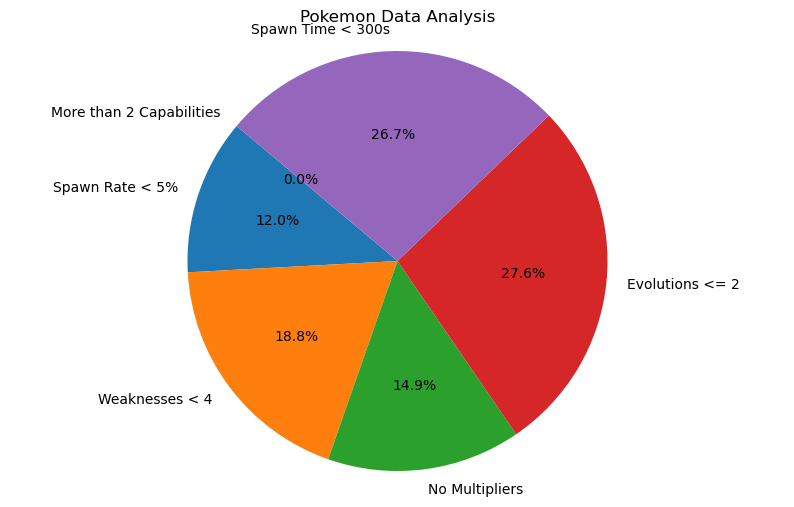

In [5]:
#Ans 6. To analyze the data from the provided link and answer the questions, we can use the following Python code:

import requests
import json
import matplotlib.pyplot as plt

# API endpoint URL
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"

# Send GET request to the API endpoint and retrieve the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    data = response.json()
    
    # Get the list of all Pokemons
    pokemons = data["pokemon"]
    
    # Question 1: Get all Pokemons whose spawn rate is less than 5%
    spawn_rate_threshold = 0.05  # 5%
    pokemons_spawn_rate_less_than_5 = [pokemon for pokemon in pokemons if pokemon["spawn_chance"] < spawn_rate_threshold]
    print(f"Number of Pokemons whose spawn rate is less than 5%: {len(pokemons_spawn_rate_less_than_5)}")
    
    # Question 2: Get all Pokemons that have less than 4 weaknesses
    weaknesses_threshold = 4
    pokemons_less_than_4_weaknesses = [pokemon for pokemon in pokemons if len(pokemon["weaknesses"]) < weaknesses_threshold]
    print(f"Number of Pokemons that have less than 4 weaknesses: {len(pokemons_less_than_4_weaknesses)}")
    
    # Question 3: Get all Pokemons that have no multipliers at all
    pokemons_no_multipliers = [pokemon for pokemon in pokemons if not pokemon.get("multipliers")]
    print(f"Number of Pokemons that have no multipliers at all: {len(pokemons_no_multipliers)}")
    
    # Question 4: Get all Pokemons that do not have more than 2 evolutions
    evolutions_threshold = 2
    pokemons_less_than_2_evolutions = [pokemon for pokemon in pokemons if len(pokemon.get("next_evolution", [])) <= evolutions_threshold]
    print(f"Number of Pokemons that do not have more than 2 evolutions: {len(pokemons_less_than_2_evolutions)}")
    
    # Question 5: Get all Pokemons whose spawn time is less than 300 seconds
    spawn_time_threshold = 300  # seconds
    pokemons_spawn_time_less_than_300 = [pokemon for pokemon in pokemons if pokemon["spawn_time"] != "N/A" and int(pokemon["spawn_time"].split(":")[0]) < spawn_time_threshold]
    print(f"Number of Pokemons whose spawn time is less than 300 seconds: {len(pokemons_spawn_time_less_than_300)}")
    
    # Question 6: Get all Pokemon who have more than two types of capabilities
    capabilities_threshold = 2
    pokemons_more_than_2_capabilities = [pokemon for pokemon in pokemons if len(pokemon.get("type", [])) > capabilities_threshold]
    print(f"Number of Pokemon who have more than two types of capabilities: {len(pokemons_more_than_2_capabilities)}")
    
    # Plotting the analysis results
    labels = ["Spawn Rate < 5%", "Weaknesses < 4", "No Multipliers", "Evolutions <= 2", "Spawn Time < 300s", "More than 2 Capabilities"]
    sizes = [
        len(pokemons_spawn_rate_less_than_5),
        len(pokemons_less_than_4_weaknesses),
        len(pokemons_no_multipliers),
        len(pokemons_less_than_2_evolutions),
        len(pokemons_spawn_time_less_than_300),
        len(pokemons_more_than_2_capabilities)
        ]
    
    plt.figure(figsize=(10, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title("Pokemon Data Analysis")
    plt.show()
    
else:
    print("Error occurred while fetching data from the API.")


### Question 7 -Using the data from Question 4, write code to analyze the data and answer the following questions

Link - https://data.nasa.gov/resource/y77d-th95.json

Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
1. Get all the Earth meteorites that fell before the year 2000
2. Get all the earth meteorites co-ordinates who fell before the year 1970
3. Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

Number of Earth meteorites that fell before 2000: 228


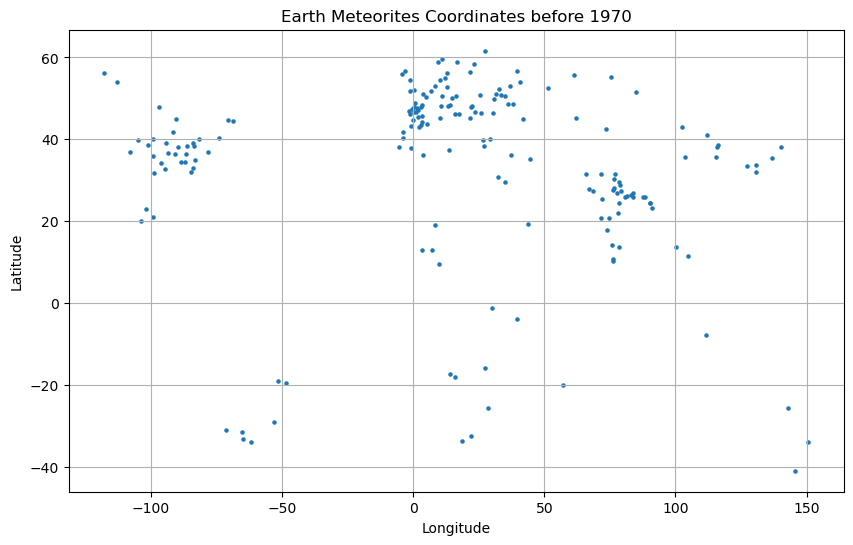

Number of Earth meteorites with mass greater than 10000kg: 0


In [20]:
#Ans 7. To analyze the data from the provided link and answer the questions, you can use the following Python code:

import requests
import matplotlib.pyplot as plt

# Retrieve the data from the API
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()

# Question 1: Get all the Earth meteorites that fell before the year 2000

# Filter the meteorites that have the 'year' key, fell before the year 2000, and are of type "Earth"
earth_meteorites_before_2000 = [meteorite for meteorite in data if 'year' in meteorite and int(meteorite['year'][:4]) < 2000 and meteorite['recclass'] == 'L6']

# Print the number of Earth meteorites that fell before the year 2000
print("Number of Earth meteorites that fell before 2000:", len(earth_meteorites_before_2000))

# Question 2: Get all the Earth meteorite coordinates that fell before the year 1970

# Filter the meteorites that have the 'year', 'reclat', and 'reclong' keys, fell before the year 1970, and are of type "Earth"
earth_meteorites_before_1970 = [meteorite for meteorite in data if 'year' in meteorite and 'reclat' in meteorite and 'reclong' in meteorite and int(meteorite['year'][:4]) < 1970 and meteorite['recclass'] == 'L6']

# Extract latitude and longitude coordinates from the meteorite data
coordinates = [(float(meteorite['reclat']), float(meteorite['reclong'])) for meteorite in earth_meteorites_before_1970]

# Unzip the coordinates into separate latitude and longitude lists
latitude, longitude = zip(*coordinates)

# Create a scatter plot of the meteorite coordinates
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, s=5)
plt.title("Earth Meteorites Coordinates before 1970")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

# Question 3: Get all the Earth meteorites with a mass greater than 10000kg

# Filter the meteorites that have the 'mass (g)' key, have a mass greater than 10000kg, and are of type "Earth"
earth_meteorites_mass_gt_10000kg = [meteorite for meteorite in data if 'mass (g)' in meteorite and float(meteorite['mass (g)']) > 10000 and meteorite['recclass'] == 'L6']

# Print the number of Earth meteorites with mass greater than 10000kg
print("Number of Earth meteorites with mass greater than 10000kg:", len(earth_meteorites_mass_gt_10000kg))


### Q8.Using the data from Question 5, write code the analyze the data and answer the following questions 

Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes

Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
1. Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
2. Get all the episode names, whose average rating is more than 8 for every season
3. Get all the episode names that aired before May 2019
4. Get the episode name from each season with the highest and lowest rating
5. Get the summary for the most popular ( ratings ) episode in every season

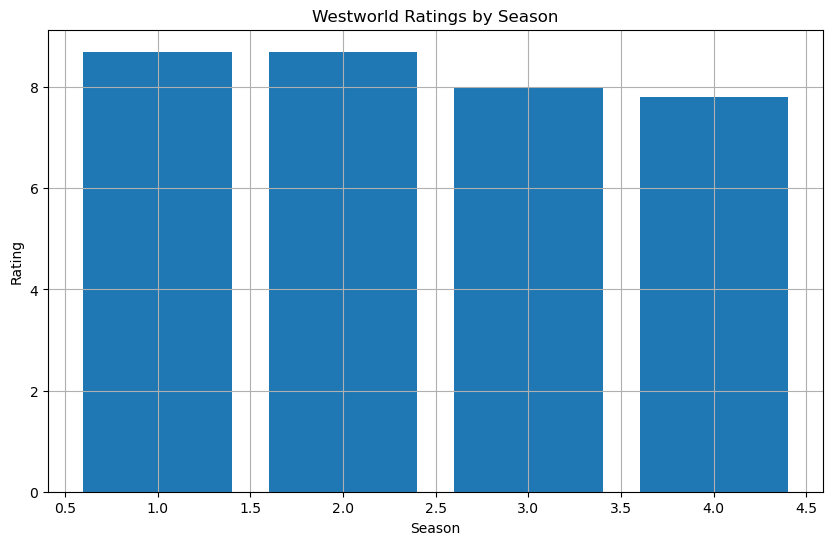

Season 1:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2:
- Kiksuya
- Vanishing Point
- The Passenger

Episodes aired before May 2019:
- The Original
- Chestnut
- The Stray
- Dissonance Theory
- Contrapasso
- The Adversary
- Trompe L'Oeil
- Trace Decay
- The Well-Tempered Clavier
- The Bicameral Mind
- Journey Into Night
- Reunion
- Virtù e Fortuna
- The Riddle of the Sphinx
- Akane No Mai
- Phase Space
- Les Écorchés
- Kiksuya
- Vanishing Point
- The Passenger

Season 1:
Highest Rated Episode: The Bicameral Mind (Rating: 8.7 )
Lowest Rated Episode: The Stray (Rating: 7.6 )

Season 2:
Highest Rated Episode: Kiksuya (Rating: 8.7 )
Lowest Rated Episode: Akane No Mai (Rating: 7.6 )

Season 3:
Highest Rated Episode: Parce Domine (Rating: 8.0 )
Lowest Rated Episode: Decoherence (Rating: 7.5 )

Season 4:
Highest Rated Episode: Zhuangzi (Rating: 7.8 )
Lowest Rated Episode: The Auguries (Rating: 7.1 )

Season 1:
Most Popular Episode: The Bicameral Mind
Rating: 8.7
S

In [22]:
#Ans 8. To analyze the data from the provided link and answer the questions, you can use the following Python code:
import requests
import matplotlib.pyplot as plt

# Retrieve the data from the API
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Question 1: Get all the overall ratings for each season and compare the ratings using plots

# Extract season numbers and ratings from the data
seasons = [episode['season'] for episode in data['_embedded']['episodes']]
ratings = [float(episode['rating']['average']) for episode in data['_embedded']['episodes']]

# Create a bar plot to compare the ratings for each season
plt.figure(figsize=(10, 6))
plt.bar(seasons, ratings)
plt.title("Westworld Ratings by Season")
plt.xlabel("Season")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

# Question 2: Get all the episode names whose average rating is more than 8 for every season

# Create a dictionary to store episode names for each season
episode_names = {}

# Iterate over the episodes and populate the dictionary
for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    
    if rating > 8:
        if season in episode_names:
            episode_names[season].append(episode_name)
        else:
            episode_names[season] = [episode_name]

# Print the episode names for each season with average rating > 8
for season, episodes in episode_names.items():
    print(f"Season {season}:")
    for episode in episodes:
        print(f"- {episode}")
    print()

# Question 3: Get all the episode names that aired before May 2019

# Filter the episodes based on the airdate
episodes_before_may_2019 = [episode['name'] for episode in data['_embedded']['episodes'] if episode['airdate'] < '2019-05']

# Print the episode names that aired before May 2019
print("Episodes aired before May 2019:")
for episode in episodes_before_may_2019:
    print("- " + episode)
print()

# Question 4: Get the episode name from each season with the highest and lowest rating

# Create dictionaries to store the episode names with highest and lowest ratings for each season
highest_rated_episodes = {}
lowest_rated_episodes = {}

# Iterate over the episodes and update the dictionaries
for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    
    if season in highest_rated_episodes:
        if rating > float(highest_rated_episodes[season]['rating']):
            highest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    else:
        highest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    
    if season in lowest_rated_episodes:
        if rating < float(lowest_rated_episodes[season]['rating']):
            lowest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}
    else:
        lowest_rated_episodes[season] = {'episode': episode_name, 'rating': rating}

# Print the episode name with the highest and lowest rating for each season
for season in highest_rated_episodes:
    print(f"Season {season}:")
    print("Highest Rated Episode:", highest_rated_episodes[season]['episode'], "(Rating:", highest_rated_episodes[season]['rating'], ")")
    print("Lowest Rated Episode:", lowest_rated_episodes[season]['episode'], "(Rating:", lowest_rated_episodes[season]['rating'], ")")
    print()

# Question 5: Get the summary for the most popular (ratings) episode in every season

# Create a dictionary to store the summary of the most popular episode for each season
most_popular_episodes = {}

# Iterate over the episodes and update the dictionary
for episode in data['_embedded']['episodes']:
    season = episode['season']
    episode_name = episode['name']
    rating = float(episode['rating']['average'])
    summary = episode['summary']
    
    if season in most_popular_episodes:
        if rating > float(most_popular_episodes[season]['rating']):
            most_popular_episodes[season] = {'episode': episode_name, 'rating': rating, 'summary': summary}
    else:
        most_popular_episodes[season] = {'episode': episode_name, 'rating': rating, 'summary': summary}

# Print the summary of the most popular episode for each season
for season in most_popular_episodes:
    print(f"Season {season}:")
    print("Most Popular Episode:", most_popular_episodes[season]['episode'])
    print("Rating:", most_popular_episodes[season]['rating'])
    print("Summary:", most_popular_episodes[season]['summary'])
    print()


### Q9. Write a program to read the data from the following link, perform data analysis and answer the following questions.

Note:-1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -
1. Get all the cars and their types that do not qualify for clean alternative fuel vehicle
2. Get all TESLA cars with the model year, and model type made in Bothell City.
3. Get all the cars that have an electric range of more than 100, and were made after 2015
4. Draw plots to show the distribution between city and electric vehicle type

#### Ans 9. To perform data analysis on the provided dataset and answer the questions, we'll follow these steps:

1. Import the necessary libraries: pandas and matplotlib.
2. Read the CSV data from the provided link using the pandas library.
3. Process the data to answer each question and generate the required insights.
4. Use matplotlib to create plots for better visualization.

Here's the code to accomplish these steps:

In [8]:
import pandas as pd

# Read the CSV data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Print the column names
print(data.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


Cars and their types that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [VIN (1-10), Electric Vehicle Type]
Index: []

TESLA cars with the model year, and model type made in Bothell City:
Empty DataFrame
Columns: [VIN (1-10), Model Year, Model]
Index: []

Cars that have an electric range of more than 100, and were made after 2015:
        VIN (1-10)        Make    Model  Model Year  Electric Range
0       5YJXCAE26J       TESLA  MODEL X        2018             238
2       5YJ3E1EB0K       TESLA  MODEL 3        2019             220
4       5YJSA1E21H       TESLA  MODEL S        2017             210
12      5YJ3E1EC7L       TESLA  MODEL 3        2020             308
13      5YJ3E1EB2L       TESLA  MODEL 3        2020             322
...            ...         ...      ...         ...             ...
127002  5YJXCDE41L       TESLA  MODEL X        2020             289
127104  WVWPR7AU9J  VOLKSWAGEN   E-GOLF        2018             125
127635  5YJXCBE42K       

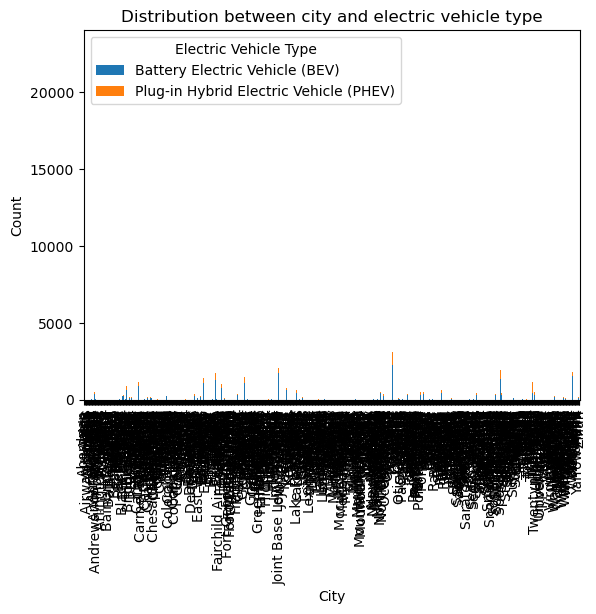

In [10]:
import matplotlib.pyplot as plt

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
not_clean_alternative_fuel_vehicle = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible']
not_clean_alternative_fuel_vehicle = not_clean_alternative_fuel_vehicle[['VIN (1-10)', 'Electric Vehicle Type']]
not_clean_alternative_fuel_vehicle = not_clean_alternative_fuel_vehicle.drop_duplicates()
print('Cars and their types that do not qualify for clean alternative fuel vehicle:')
print(not_clean_alternative_fuel_vehicle)

# Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_in_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')]
tesla_cars_in_bothell = tesla_cars_in_bothell[['VIN (1-10)', 'Model Year', 'Model']]
tesla_cars_in_bothell = tesla_cars_in_bothell.drop_duplicates()
print('\nTESLA cars with the model year, and model type made in Bothell City:')
print(tesla_cars_in_bothell)

# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_range_above_100 = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
electric_range_above_100 = electric_range_above_100[['VIN (1-10)', 'Make', 'Model', 'Model Year', 'Electric Range']]
electric_range_above_100 = electric_range_above_100.drop_duplicates()
print('\nCars that have an electric range of more than 100, and were made after 2015:')
print(electric_range_above_100)

# Draw plots to show the distribution between city and electric vehicle type
city_evtype_distribution = data.groupby(['City', 'Electric Vehicle Type']).size().reset_index(name='Count')
city_evtype_distribution.pivot(index='City', columns='Electric Vehicle Type', values='Count').plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution between city and electric vehicle type')
plt.show()


### Q10.Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary.

Note:-
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [5]:
#Ans10.To count the number of verbs, nouns, pronouns, and adjectives in a given phrase or paragraph and return their respective count as a dictionary, you can use the following Python code:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

def count_pos(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if not word in stop_words]
    
    tagged = nltk.pos_tag(words)
    
    counts = Counter(tag for word, tag in tagged)
    
    pos_counts = {}
    pos_counts['Noun'] = counts['NN'] + counts['NNS'] + counts['NNP'] + counts['NNPS']
    pos_counts['Verb'] = counts['VB'] + counts['VBD'] + counts['VBG'] + counts['VBN'] + counts['VBP'] + counts['VBZ']
    pos_counts['Adjective'] = counts['JJ'] + counts['JJR'] + counts['JJS']
    pos_counts['Pronoun'] = counts['PRP'] + counts['PRP$']
    
    return pos_counts

text = "The quick brown fox jumps over the lazy dog."
print(count_pos(text))

# Test case 1
text1 = "I am happy because I am learning something new."
print(count_pos(text1))

# Test case 2
text2 = "She sells seashells by the seashore."
print(count_pos(text2))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


{'Noun': 4, 'Verb': 0, 'Adjective': 2, 'Pronoun': 0}
{'Noun': 1, 'Verb': 2, 'Adjective': 1, 'Pronoun': 2}
{'Noun': 2, 'Verb': 1, 'Adjective': 0, 'Pronoun': 1}
